In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [44]:
import kagglehub

path = kagglehub.dataset_download("aslanahmedov/walmart-sales-forecast")
print(path)


Using Colab cache for faster access to the 'walmart-sales-forecast' dataset.
/kaggle/input/walmart-sales-forecast


In [45]:
import os
os.listdir(path)


['features.csv', 'stores.csv', 'train.csv', 'test.csv']

In [46]:
train = pd.read_csv(path + "/train.csv")
features = pd.read_csv(path + "/features.csv")
stores = pd.read_csv(path + "/stores.csv")



In [47]:
train.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [48]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [49]:
features.columns


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [50]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [51]:
stores.columns


Index(['Store', 'Type', 'Size'], dtype='object')

In [52]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [53]:
train.dtypes



,0
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool


In [54]:
features.dtypes



,0
Store,int64
Date,object
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64
MarkDown5,float64
CPI,float64


In [55]:
stores.dtypes

,0
Store,int64
Type,object
Size,int64


In [56]:
df = train.merge(
    features,
    on=['Store', 'Date', 'IsHoliday'],
    how='left'
)


In [57]:
df = df.merge(
    stores,
    on='Store',
    how='left'
)


In [58]:
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


The dataset was provided in multiple files. The training data was merged with additional feature and store metadata using common keys such as Store, Date, and IsHoliday to construct a comprehensive dataset for sales forecasting

In [60]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

In [61]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for col in markdown_cols:
    df[col] = df[col].fillna(0)


In [62]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)



In [63]:
df['IsHoliday'] = df['IsHoliday'].astype(int)


In [81]:
df = df.sort_values(['Store','Dept','Date'])




In [82]:
df['Lag_1'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)

In [83]:
df['Rolling_Mean_4'] = df.groupby(['Store','Dept'])['Weekly_Sales']\
                          .transform(lambda x: x.shift(1).rolling(4).mean())



In [84]:
df = df.dropna()


In [85]:
train_data = df[df['Year'] < 2012]
test_data = df[df['Year'] == 2012]

X_train = train_data.drop(['Weekly_Sales','Date'], axis=1)
y_train = train_data['Weekly_Sales']

X_test = test_data.drop(['Weekly_Sales','Date'], axis=1)
y_test = test_data['Weekly_Sales']

In [86]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [87]:
print("----- Linear Regression -----")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))
print()


----- Linear Regression -----
MAE: 2107.40543477648
RMSE: 4410.147816863624
R2: 0.9603018217039802



In [88]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [89]:
print("----- Random Forest -----")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


----- Random Forest -----
MAE: 1643.012817034048
RMSE: 3540.5415561962236
R2: 0.9744139244465316


In [90]:
test_data = test_data.copy()
test_data['Predicted_Sales'] = y_pred_rf


In [91]:
weekly_actual = test_data.groupby('Date')['Weekly_Sales'].sum()
weekly_pred = test_data.groupby('Date')['Predicted_Sales'].sum()


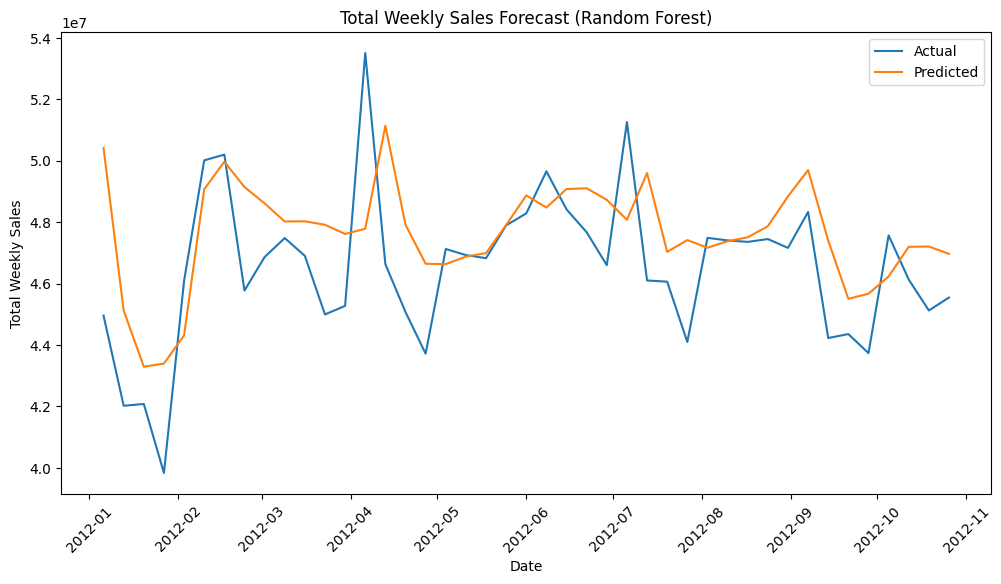

In [92]:
plt.figure(figsize=(12,6))

plt.plot(weekly_actual.index, weekly_actual.values, label='Actual')
plt.plot(weekly_pred.index, weekly_pred.values, label='Predicted')

plt.title("Total Weekly Sales Forecast (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()


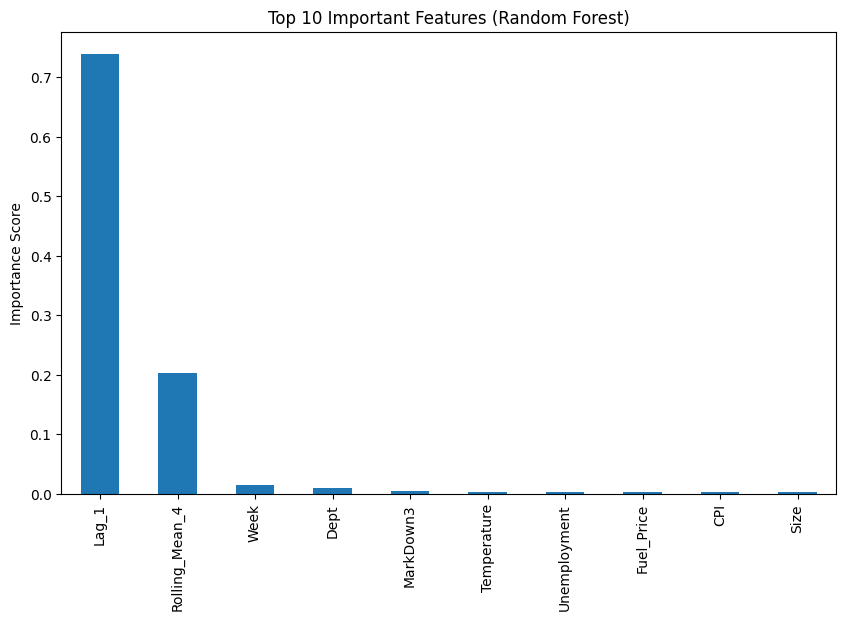

In [93]:
import pandas as pd
import matplotlib.pyplot as plt


importances = rf.feature_importances_
feature_names = X_train.columns


feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Important Features (Random Forest)")
plt.ylabel("Importance Score")
plt.show()


In [94]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)


In [95]:
print("----- XGBoost -----")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2:", r2_score(y_test, y_pred_xgb))


----- XGBoost -----
MAE: 1633.7225596891758
RMSE: 3490.6614849082184
R2: 0.9751297727341834


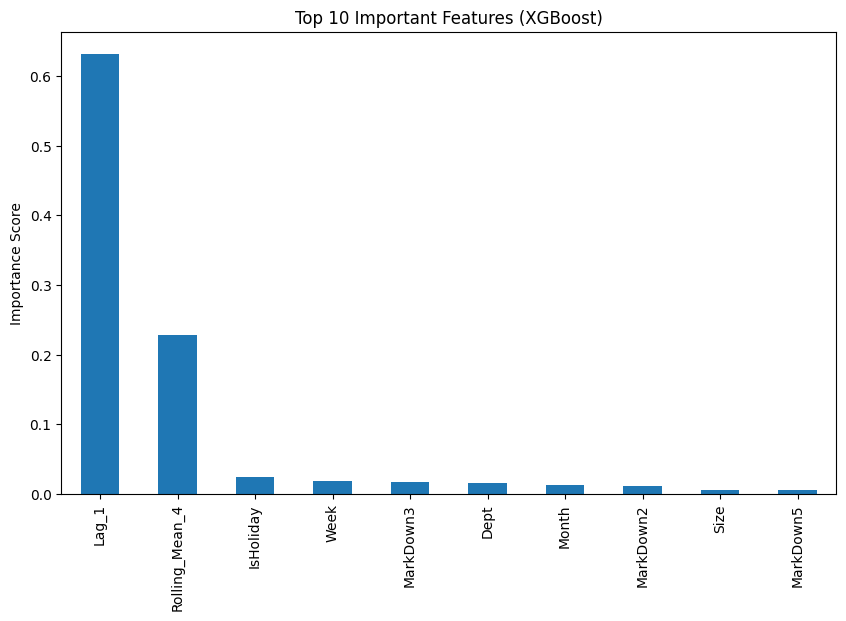

In [96]:
xgb_importances = pd.Series(
    xgb.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
xgb_importances.head(10).plot(kind='bar')
plt.title("Top 10 Important Features (XGBoost)")
plt.ylabel("Importance Score")
plt.show()


In [97]:
print("Model Comparison Summary:")
print("-----------------------------------")
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


Model Comparison Summary:
-----------------------------------
Linear Regression R2: 0.9603018217039802
Random Forest R2: 0.9744139244465316
XGBoost R2: 0.9751297727341834


XGBoost achieved the highest R² score of 0.975, indicating superior performance compared to Random Forest and Linear Regression. Tree-based ensemble models performed better due to their ability to capture nonlinear relationships in retail sales data.